<a href="https://colab.research.google.com/github/alefonsecabb/Time-Series-analysis-with-Python/blob/main/Time_series_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysing sales

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
alucar = pd.read_csv('alucar.csv')

In [3]:
alucar.isna().sum().sum()

0

In [4]:
print("Amount of rows and columns:", alucar.shape)


Amount of rows and columns: (24, 2)


In [5]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

,0
mes,datetime64[ns]
vendas,int64


In [6]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [7]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


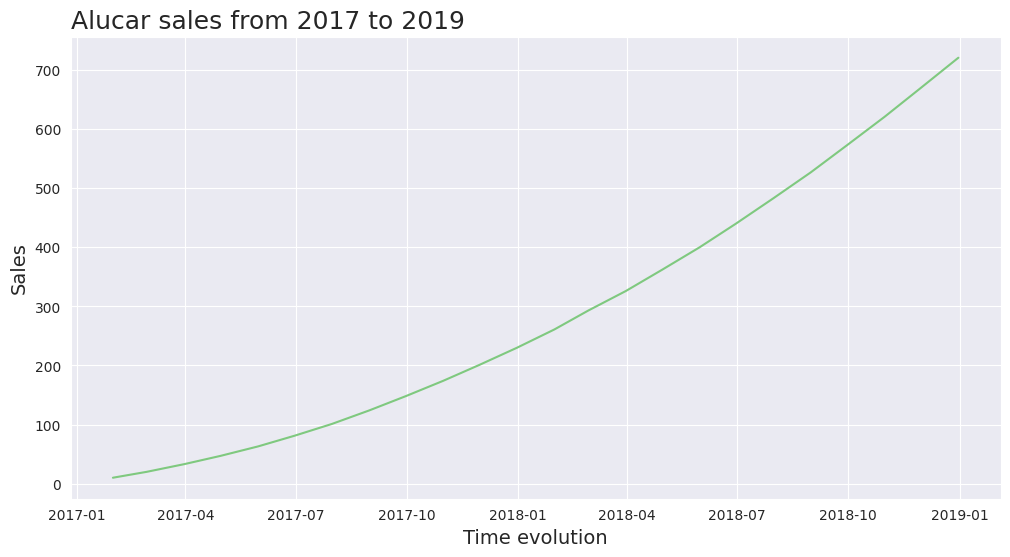

In [8]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(data=alucar, x='mes', y='vendas')
ax.figure.set_size_inches(12, 6)
ax.set_title('Alucar sales from 2017 to 2019', loc = 'left', fontsize = 18)
ax.set_xlabel('Time evolution', fontsize = 14)
ax.set_ylabel('Sales', fontsize = 14)
ax = ax

In [9]:
alucar['increase'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,increase
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


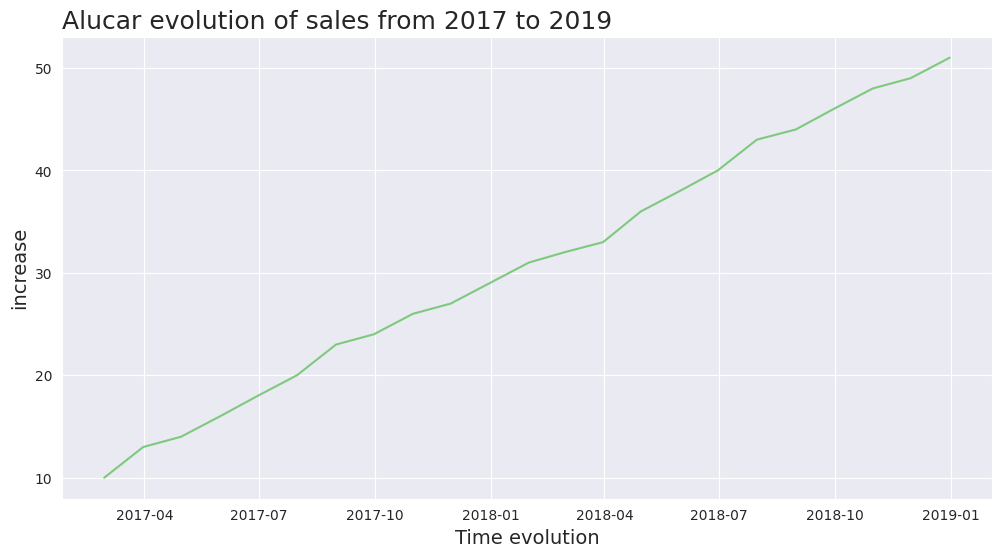

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(data=alucar, x='mes', y='increase')
ax.figure.set_size_inches(12, 6)
ax.set_title('Alucar evolution of sales from 2017 to 2019', loc = 'left', fontsize = 18)
ax.set_xlabel('Time evolution', fontsize = 14)
ax.set_ylabel('increase', fontsize = 14)
ax = ax

In [11]:
def plot(title, xlabel, ylabel, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(data=dataset, x=x, y=y)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(title, loc = 'left', fontsize = 18)
  ax.set_xlabel(xlabel, fontsize = 14)
  ax.set_ylabel(ylabel, fontsize = 14)
  ax = ax

In [12]:
alucar['Acceleration'] = alucar['increase'].diff()
alucar.head()

,mes,vendas,increase,Acceleration
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


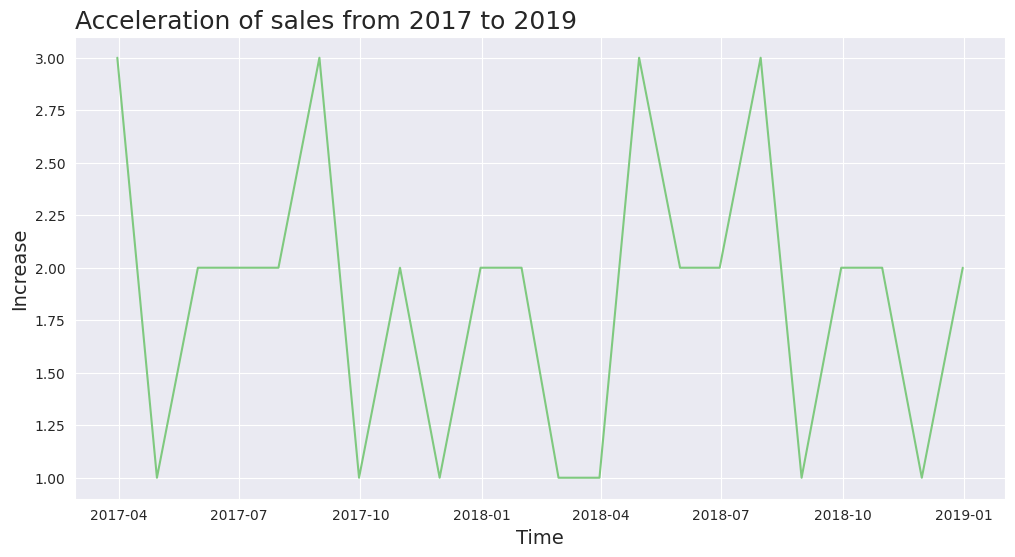

In [13]:
plot('Acceleration of sales from 2017 to 2019', 'Time', 'Increase', 'mes', 'Acceleration', alucar)

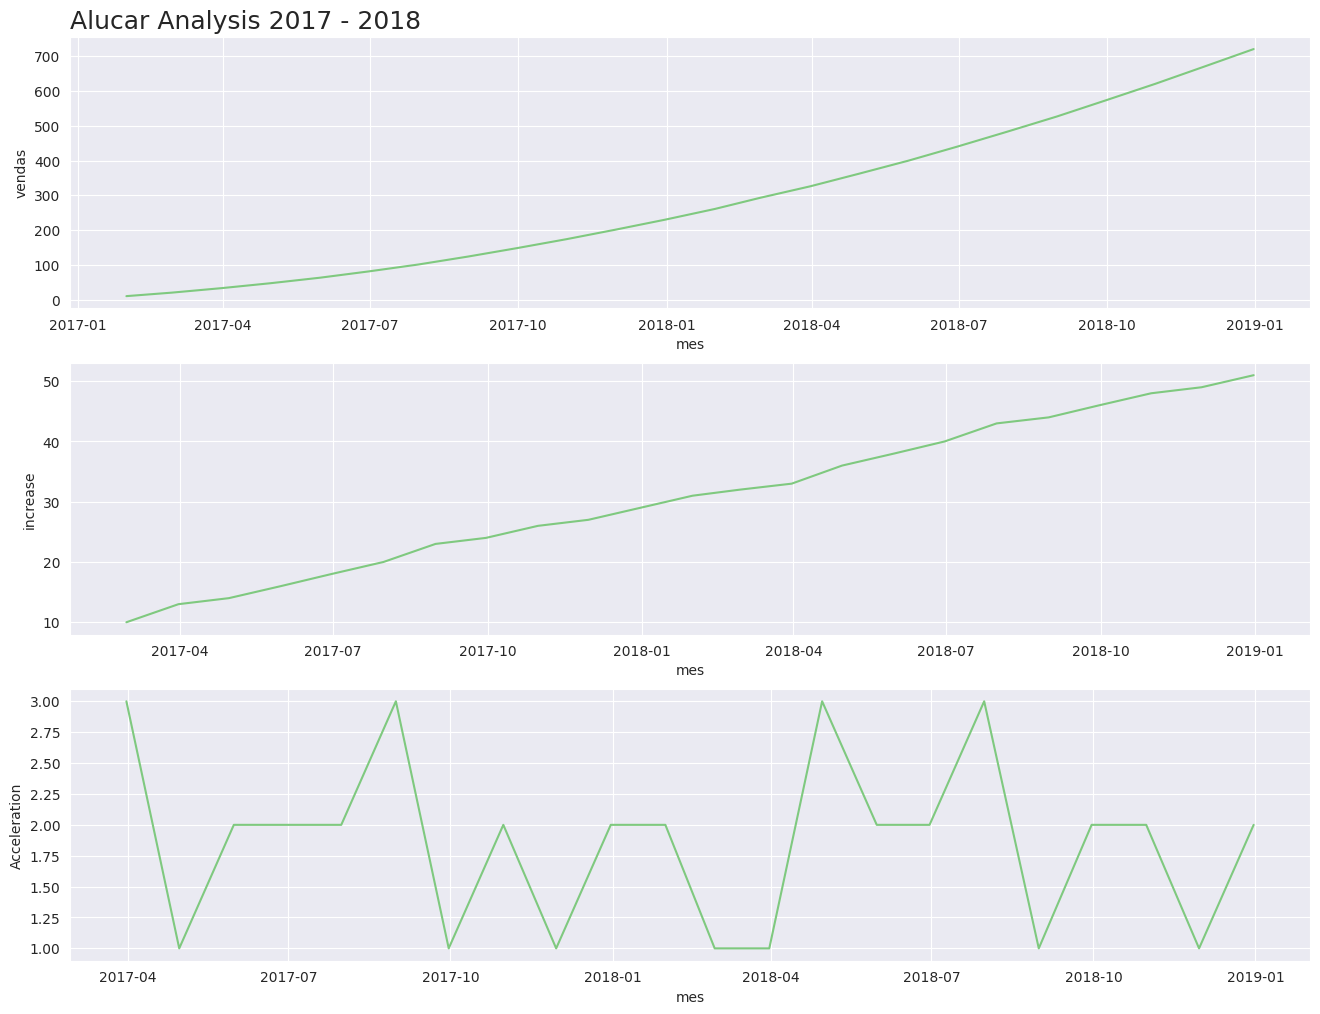

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Alucar Analysis 2017 - 2018', fontsize = 18, loc = 'left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='increase', data=alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='Acceleration', data=alucar)
ax = ax

In [15]:
def comparison_plot(x, y1, y2, y3, title, xlabel, ylabel, dataset):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(title, fontsize = 18, loc = 'left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

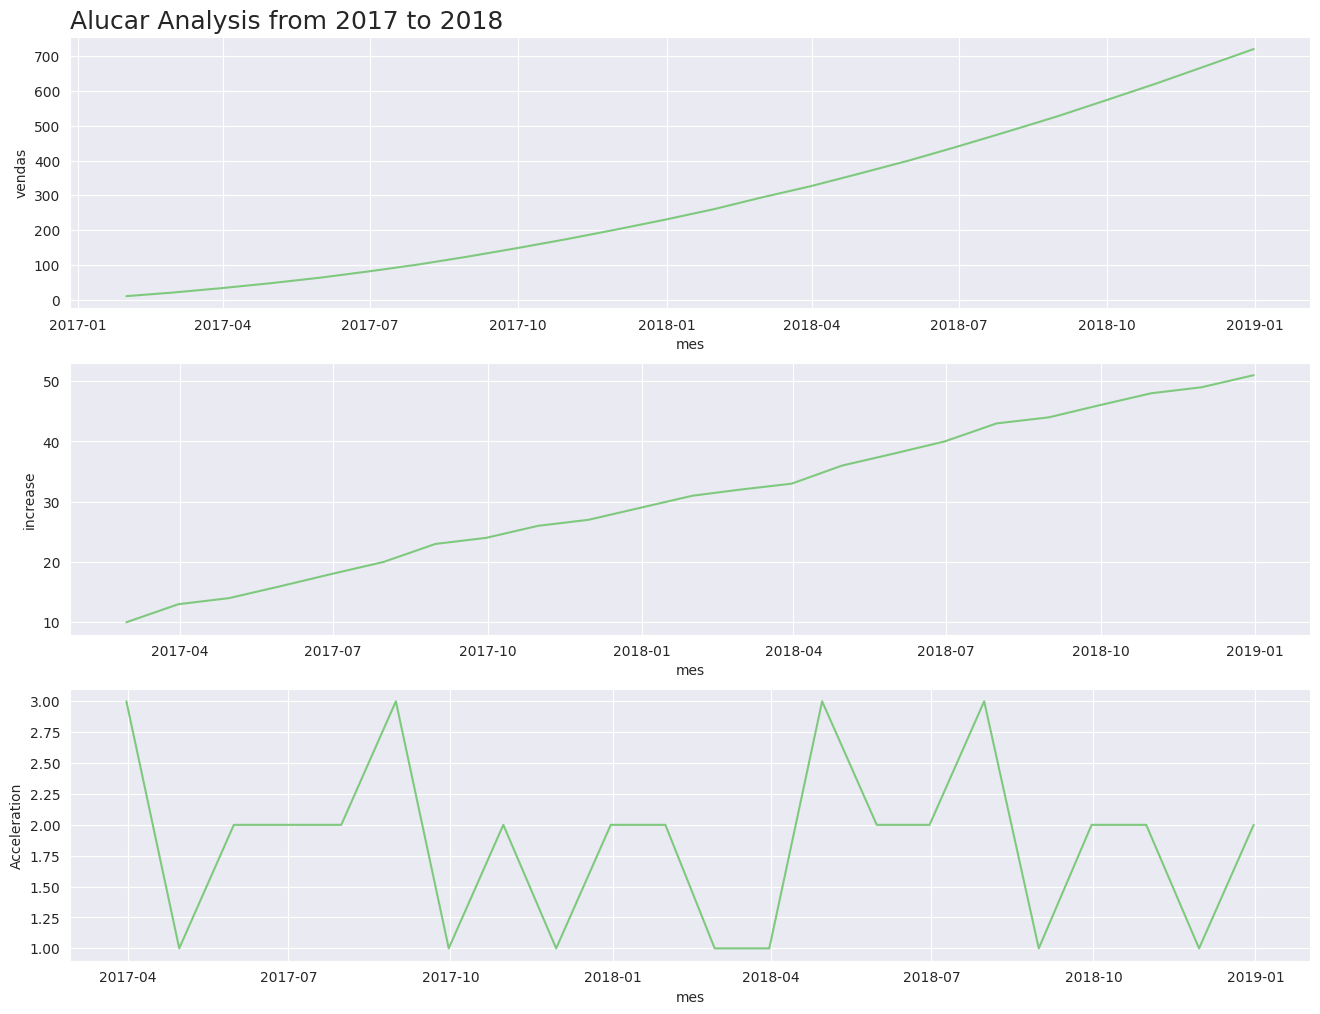

In [16]:
comparison_plot('mes', 'vendas', 'increase', 'Acceleration', 'Alucar Analysis from 2017 to 2018', 'Time', 'acceleration', alucar)

In [17]:
from pandas.plotting import autocorrelation_plot

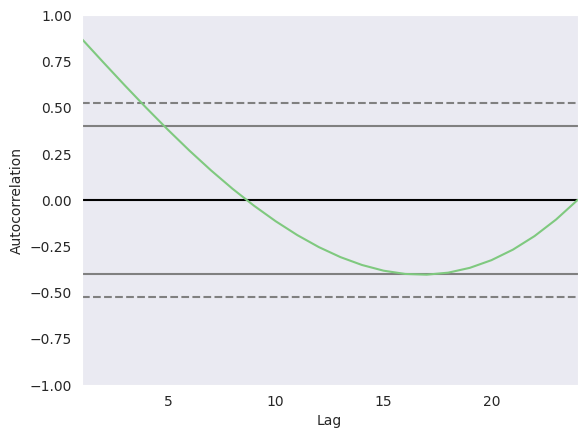

In [18]:
ax.figure.set_size_inches(12, 6)
ax.set_title('Correlation of sales from 2017 to 2019', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

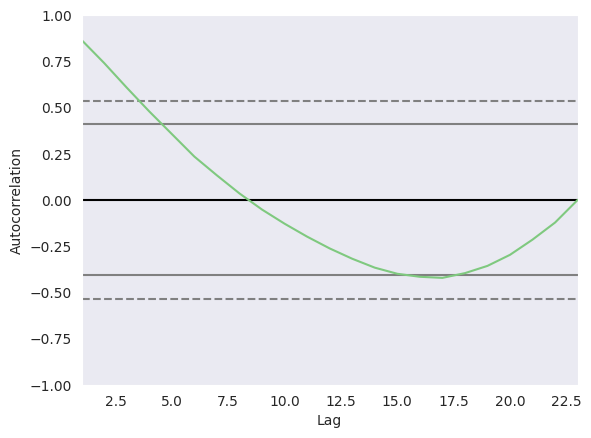

In [19]:
ax.figure.set_size_inches(12, 6)
ax.set_title('Correlation of increase from 2017 to 2019', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['increase'][1:])
ax = ax

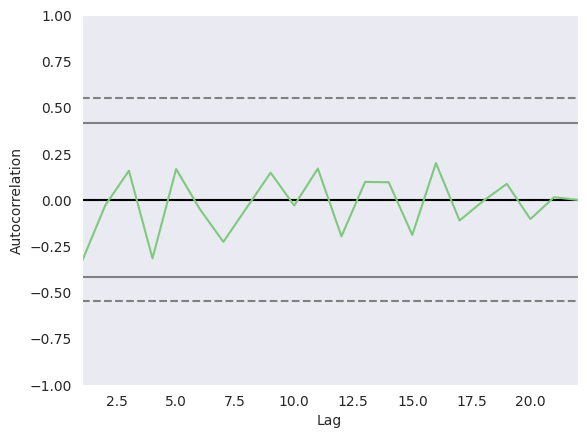

In [20]:
ax.figure.set_size_inches(12, 6)
ax.set_title('Correlation of acceleration from 2017 to 2019', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['Acceleration'][2:])
ax = ax

In [21]:
# ALUCAR - Analysing Newsletter subscribers

subscribers = pd.read_csv('newsletter_alucar.csv')
subscribers.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [22]:
subscribers.isna().sum().sum()

0

In [23]:
subscribers.dtypes

,0
mes,object
assinantes,int64


In [24]:
subscribers['mes'] = pd.to_datetime(subscribers['mes'])
subscribers.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [25]:
subscribers.dtypes

,0
mes,datetime64[ns]
assinantes,int64


In [26]:
subscribers['increase'] = subscribers['assinantes'].diff()
subscribers['acceleration'] = subscribers['increase'].diff()
subscribers.head()

,mes,assinantes,increase,acceleration
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


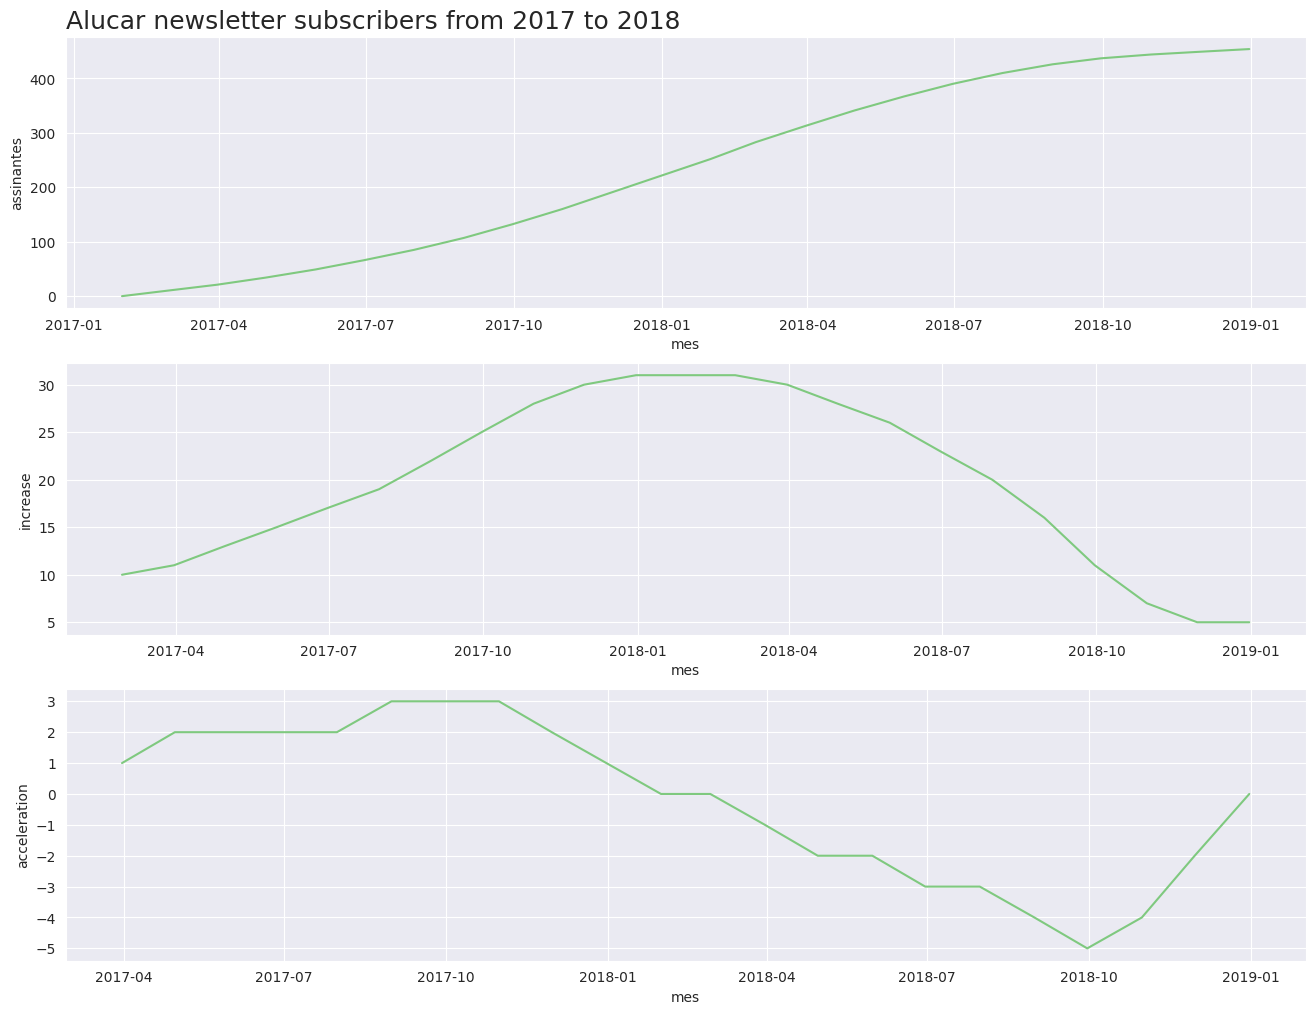

In [27]:
comparison_plot('mes', 'assinantes', 'increase', 'acceleration', 'Alucar newsletter subscribers from 2017 to 2018', 'Time', 'increase', subscribers)

In [28]:
# CHOCOLURA Sales Analysis

chocolura = pd.read_csv('chocolura.csv')
chocolura.head()



,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [29]:
chocolura.dtypes

,0
mes,object
vendas,int64


In [30]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

,0
mes,datetime64[ns]
vendas,int64


In [31]:
chocolura.isna().sum().sum()


0

In [32]:
chocolura.shape

(24, 2)

In [33]:
chocolura['increase'] = chocolura['vendas'].diff()
chocolura['acceleration'] = chocolura['increase'].diff()
chocolura.head()

,mes,vendas,increase,acceleration
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


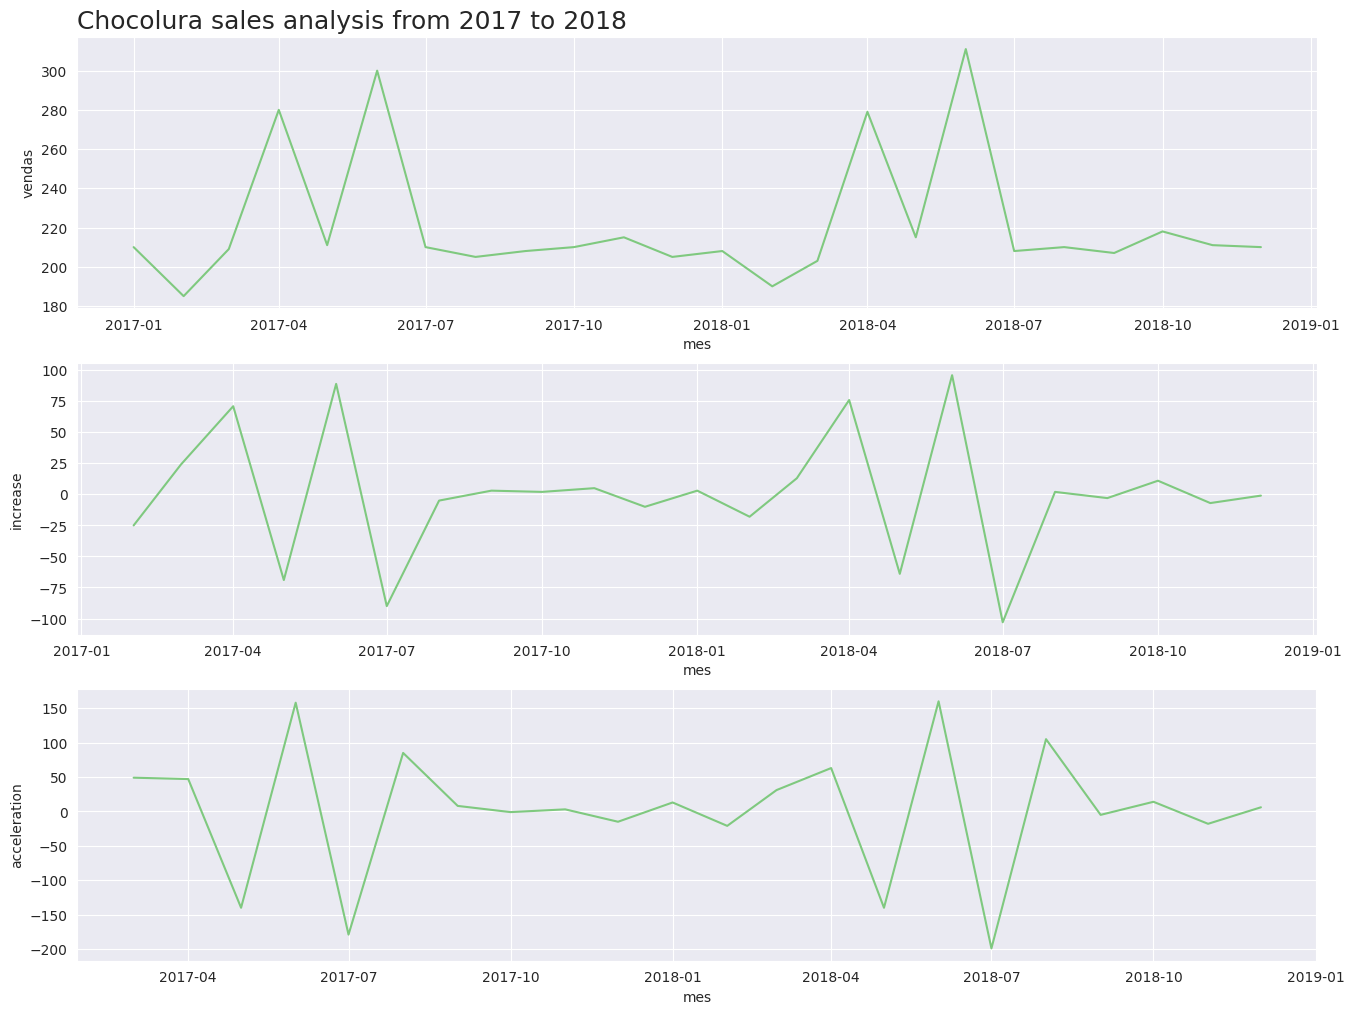

In [34]:
comparison_plot('mes', 'vendas', 'increase', 'acceleration', 'Chocolura sales analysis from 2017 to 2018', 'Time', 'increase', chocolura)

In [35]:
# Chocolura - Daily sales

daily_sales = pd.read_csv('vendas_por_dia.csv')
daily_sales.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [36]:
daily_sales.isna().sum().sum()

0

In [37]:
daily_sales.shape

(61, 2)

In [38]:
daily_sales.dtypes

,0
dia,object
vendas,int64


In [39]:
daily_sales['dia'] = pd.to_datetime(daily_sales['dia'])
daily_sales.dtypes

,0
dia,datetime64[ns]
vendas,int64


In [40]:
daily_sales['sales_increase'] = daily_sales['vendas'].diff()
daily_sales['sales_acceleration'] = daily_sales['sales_increase'].diff()
daily_sales.head()


,dia,vendas,sales_increase,sales_acceleration
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


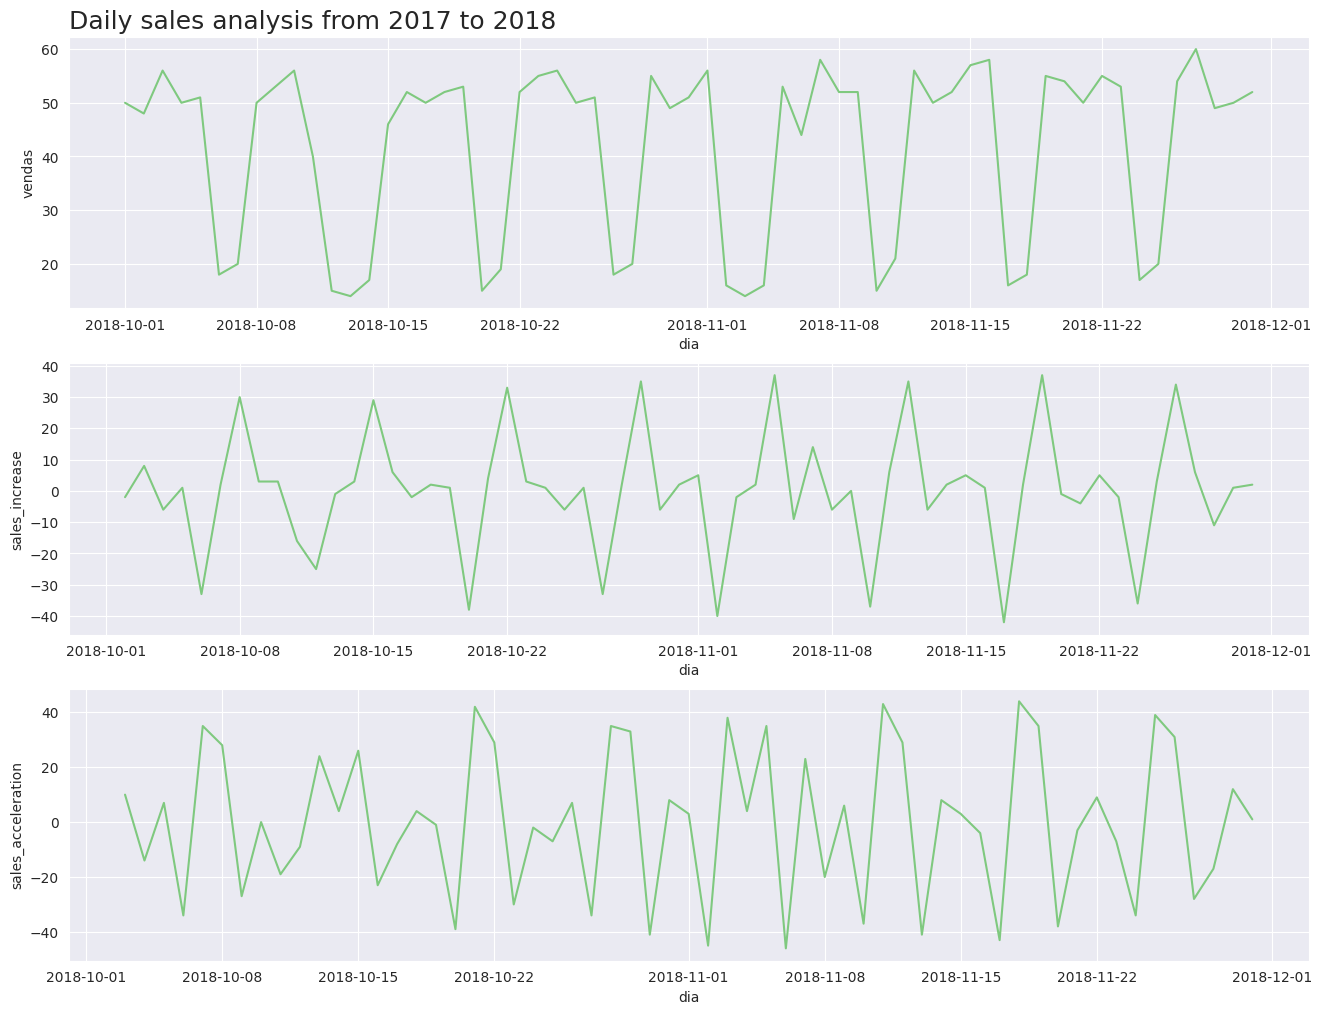

In [41]:
comparison_plot('dia', 'vendas', 'sales_increase', 'sales_acceleration', 'Daily sales analysis from 2017 to 2018', 'Time', 'increase', daily_sales)

# Analysing seasonality

In [42]:
daily_sales['week_day'] = daily_sales['dia'].dt.day_name()
daily_sales.head()

,dia,vendas,sales_increase,sales_acceleration,week_day
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


# Grouping days

In [43]:
grouped_sales = daily_sales.groupby('week_day')[['vendas', 'sales_increase', 'sales_acceleration']].mean().round()
grouped_sales


,vendas,sales_increase,sales_acceleration
week_day,,,
Friday,45.0,-7.0,-5.0
Monday,52.0,34.0,31.0
Saturday,16.0,-28.0,-20.0
Sunday,19.0,3.0,31.0
Thursday,51.0,-2.0,-3.0
Tuesday,52.0,-1.0,-34.0
Wednesday,53.0,1.0,2.0


# Daily sales Correlation

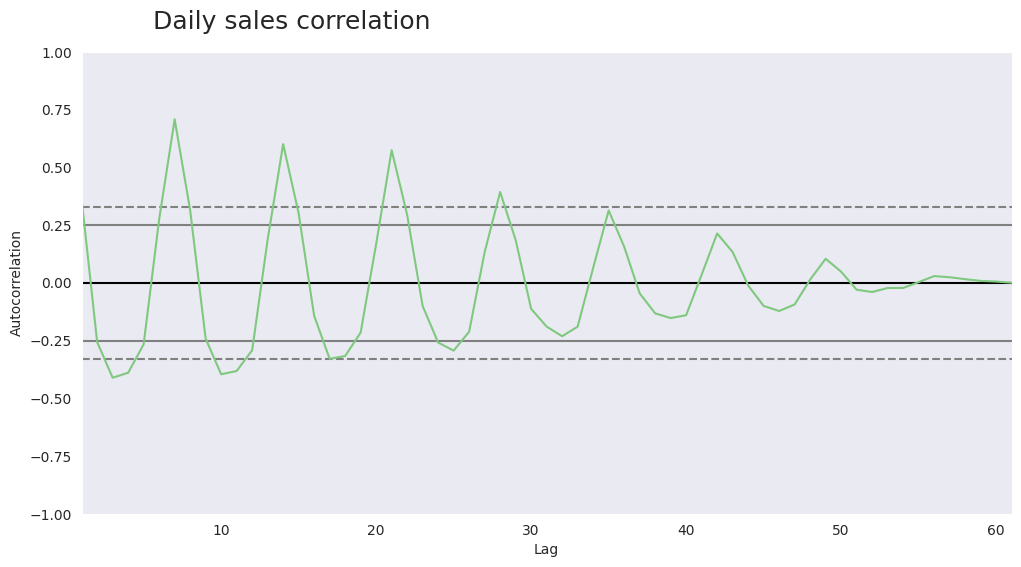

In [44]:
 ax = plt.figure(figsize=(12, 6))
 ax.suptitle('Daily sales correlation', fontsize = 18, x=0.3, y=0.95)
 autocorrelation_plot(daily_sales['vendas'])
 ax = ax

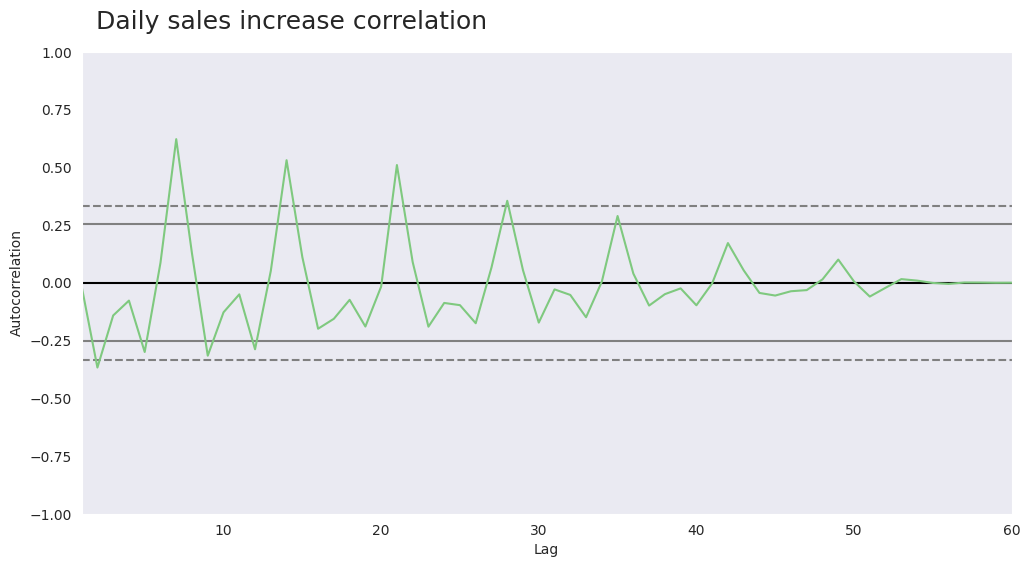

In [45]:
 ax = plt.figure(figsize=(12, 6))
 ax.suptitle('Daily sales increase correlation', fontsize = 18, x=0.3, y=0.95)
 autocorrelation_plot(daily_sales['sales_increase'][1:])
 ax = ax

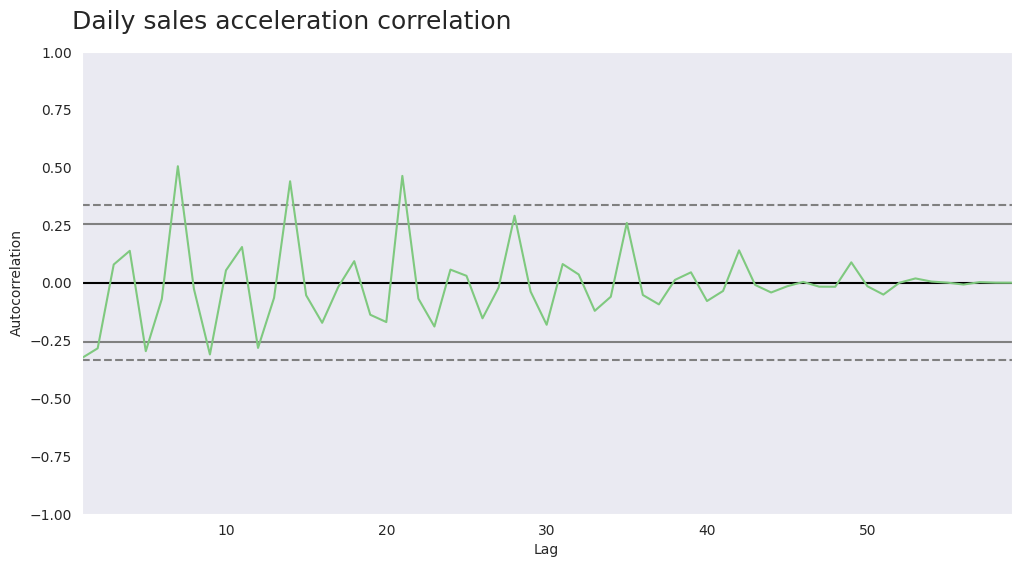

In [46]:
 ax = plt.figure(figsize=(12, 6))
 ax.suptitle('Daily sales acceleration correlation', fontsize = 18, x=0.3, y=0.95)
 autocorrelation_plot(daily_sales['sales_acceleration'][2:])
 ax = ax

# Cafelura - Sales Analysis

In [47]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [48]:
cafelura.dtypes

,0
mes,object
vendas,int64


In [49]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

,0
mes,datetime64[ns]
vendas,int64


In [50]:
cafelura.shape

(24, 2)

In [51]:
cafelura.isna().sum().sum()

0

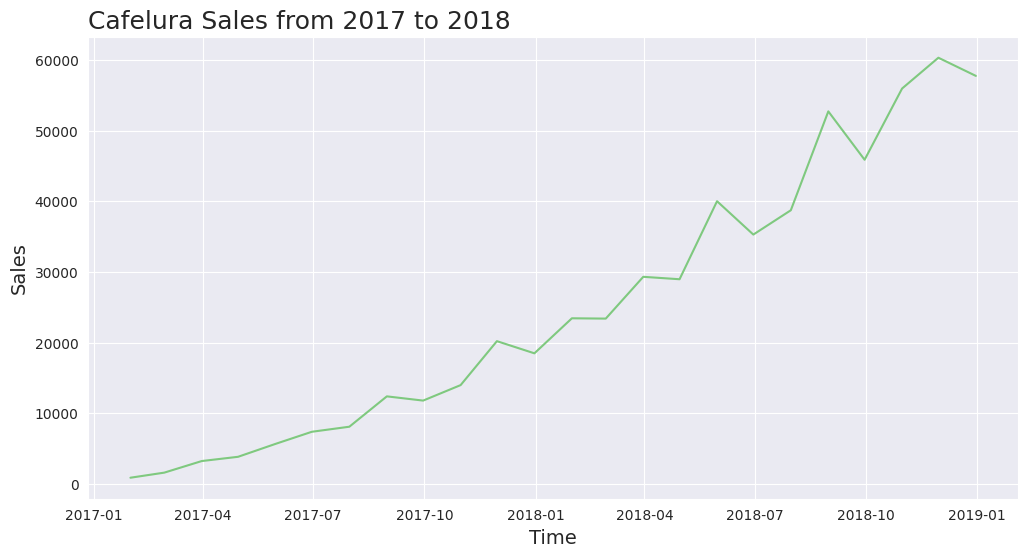

In [52]:
plot('Cafelura Sales from 2017 to 2018', 'Time', 'Sales', 'mes', 'vendas', cafelura)

In [53]:
weekend_days = pd.read_csv('dias_final_de_semana.csv')

In [54]:
weekend_days.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [55]:
weekend_days['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [56]:
cafelura['Normalized_sales'] = cafelura['vendas'] / weekend_days['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,Normalized_sales
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


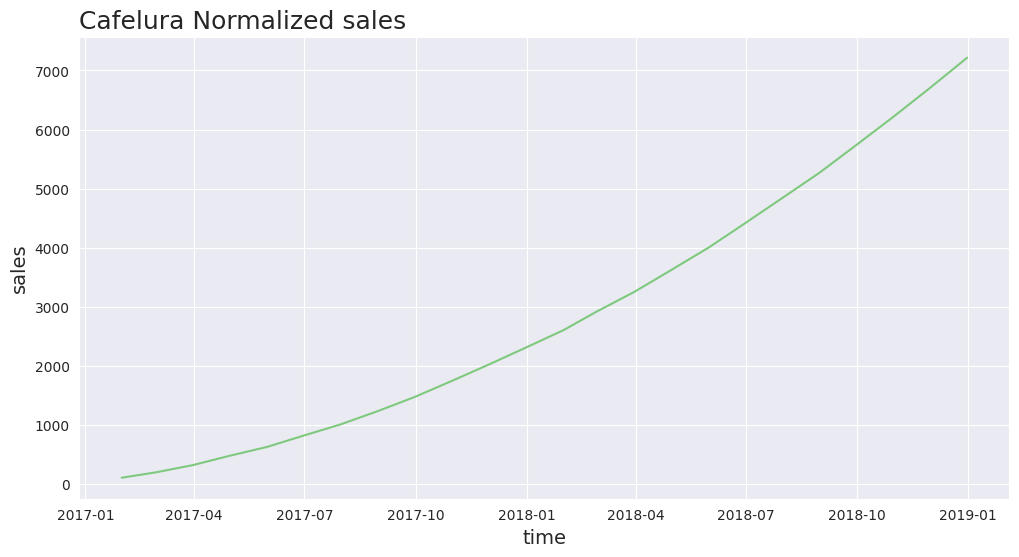

In [57]:
plot('Cafelura Normalized sales','time','sales','mes','Normalized_sales', cafelura )

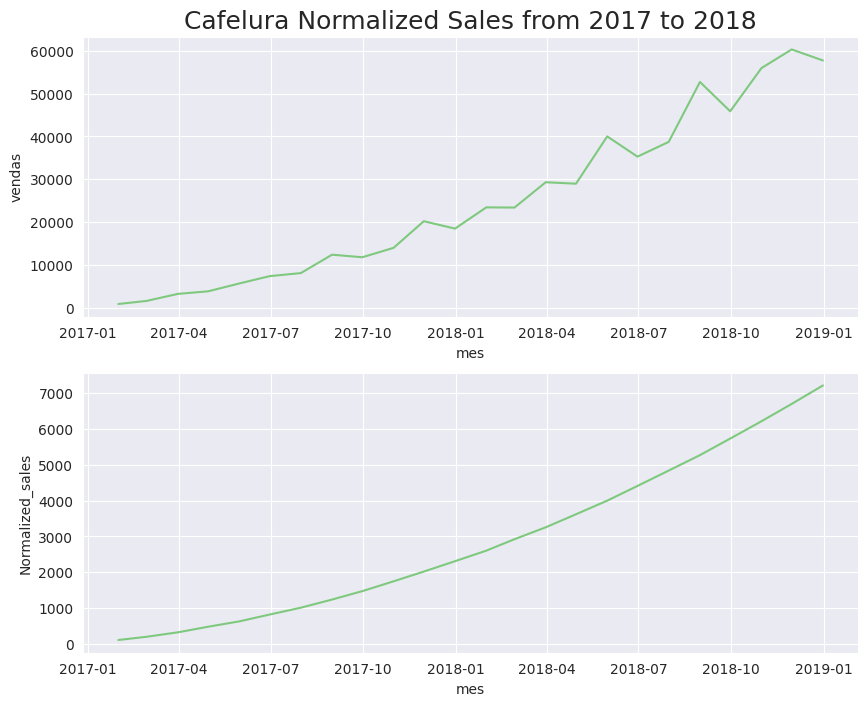

In [58]:
plt.figure(figsize=(10,8))
ax = plt.subplot(2, 1, 1)
ax.set_title('Cafelura Sales from 2017 to 2018', fontsize = 18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
plt.subplot(2, 1, 2)
ax.set_title('Cafelura Normalized Sales from 2017 to 2018', fontsize = 18)
sns.lineplot(x='mes', y='Normalized_sales', data=cafelura)
ax = ax

# Seasonal decomposition

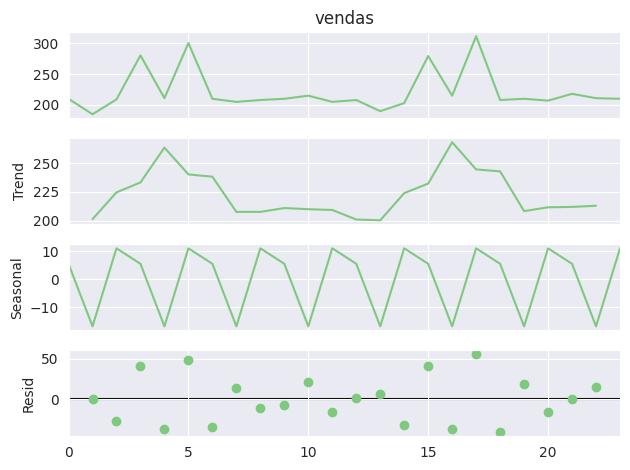

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(chocolura['vendas'], period=3)  # Pass the 'vendas' column directly
ax = result.plot()

In [80]:
observation = result.observed
tendency = result.trend
seasonal = result.seasonal
residual = result.resid

In [82]:
import pandas as pd

# Assuming 'observation', 'tendency', 'seasonal', and 'residual' are Pandas Series
data = pd.DataFrame({
    'observation': observation,
    'tendency': tendency,
    'seasonal': seasonal,
    'residual': residual
})

result = data
result.head()

,observation,tendency,seasonal,residual
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


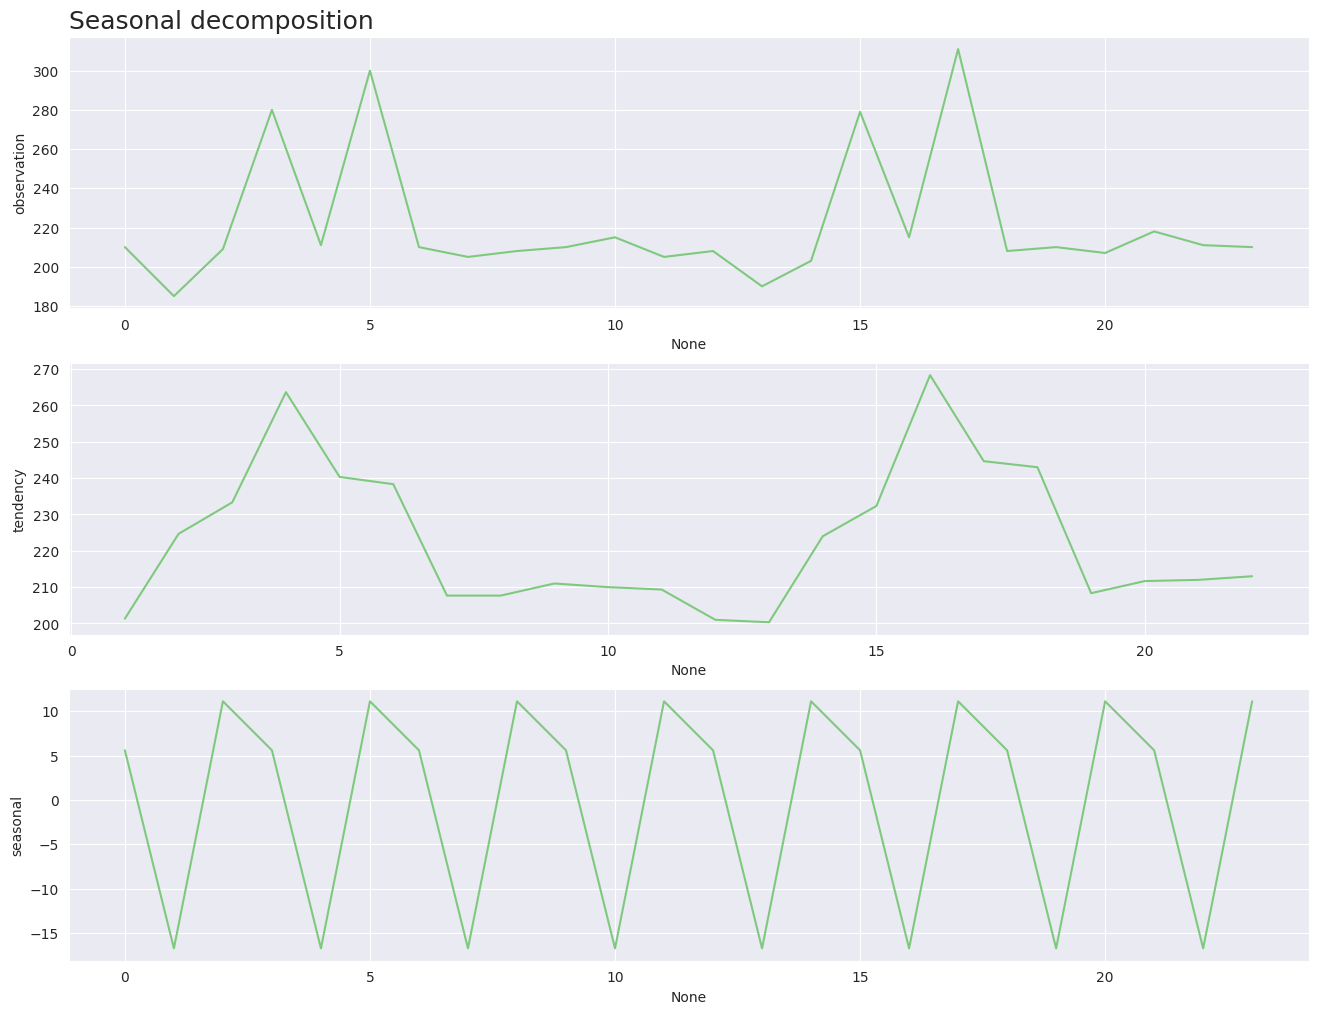

In [83]:
comparison_plot(result.index, 'observation', 'tendency', 'seasonal', 'Seasonal decomposition', 'Time', 'values', result)


# Alucel - Sales Analysis

In [84]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [85]:
alucel.dtypes

,0
dia,object
vendas,float64


In [86]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

,0
dia,datetime64[ns]
vendas,float64


In [87]:
alucel.isna().sum().sum()

0

In [88]:
alucel.shape

(61, 2)

In [89]:
alucel['increase'] = alucel['vendas'].diff()
alucel['acceleration'] = alucel['increase'].diff()
alucel.head()

,dia,vendas,increase,acceleration
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


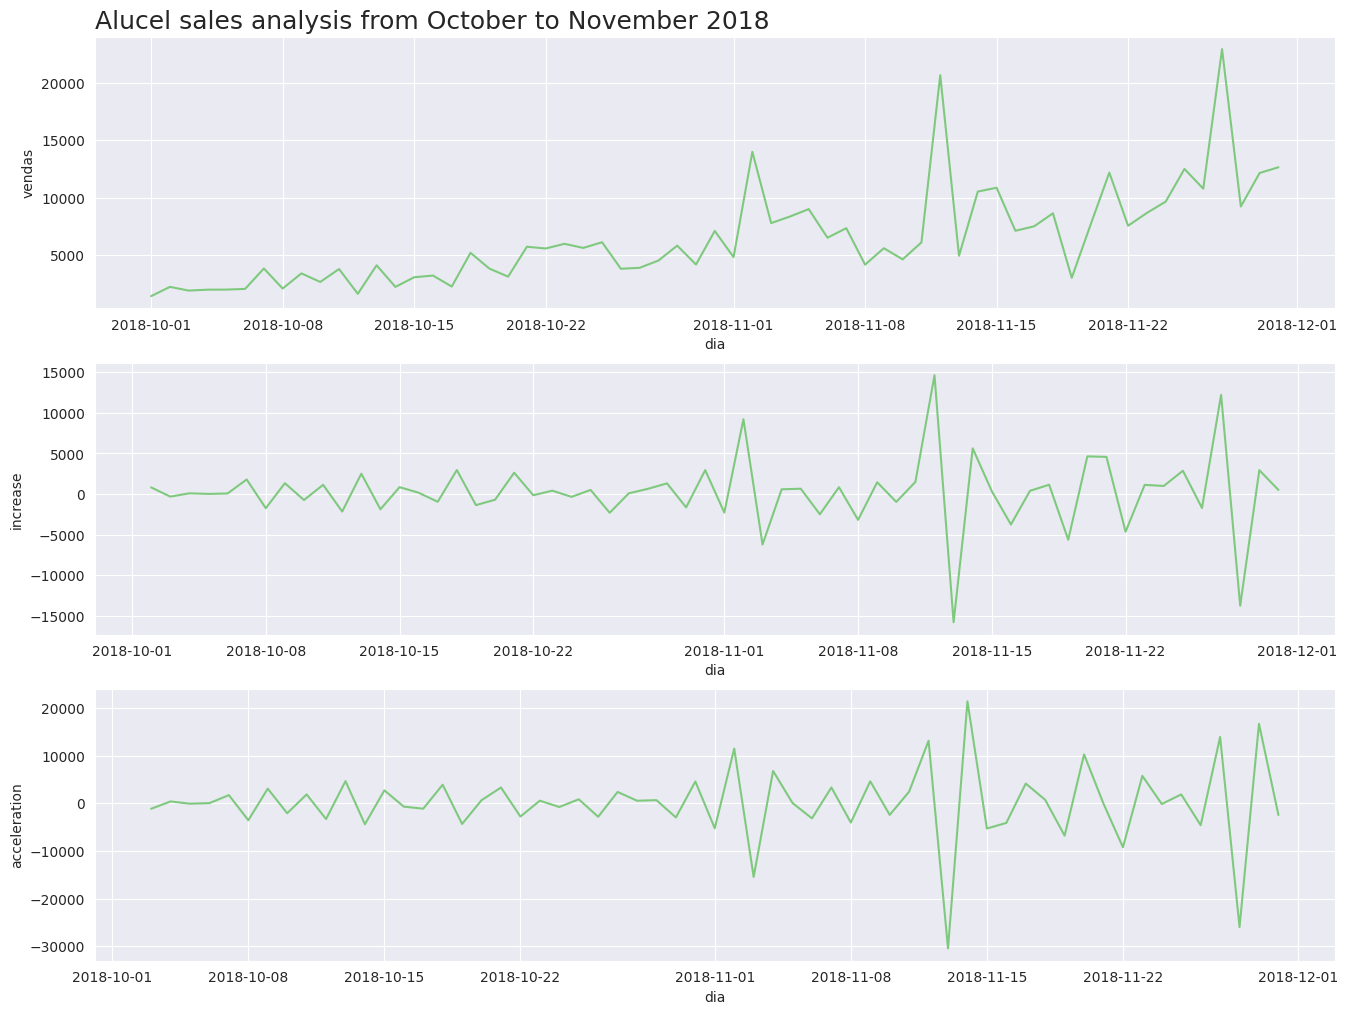

In [91]:
comparison_plot('dia', 'vendas', 'increase', 'acceleration', 'Alucel sales analysis from October to November 2018', 'Time', 'increase', alucel)

In [101]:
alucel['rolling_average'] = alucel['vendas'].rolling(7).mean()
alucel.head()

,dia,vendas,increase,acceleration,rolling_average
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN


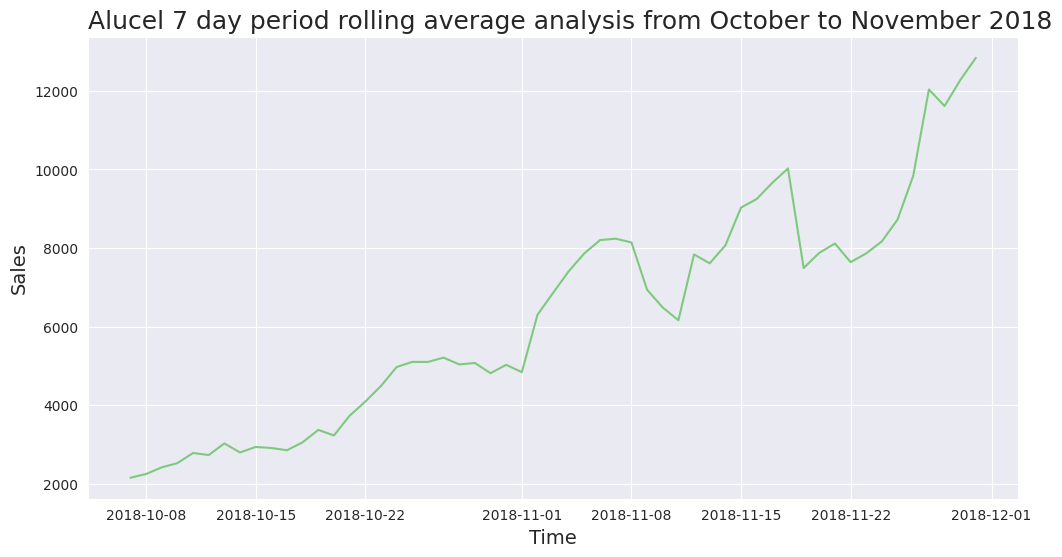

In [102]:
plot('Alucel 7 day period rolling average analysis from October to November 2018', 'Time', 'Sales', 'dia', 'rolling_average', alucel)

In [97]:
alucel['rolling_average'] = alucel['vendas'].rolling(21).mean()
alucel.head()

,dia,vendas,increase,acceleration,rolling_average
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN


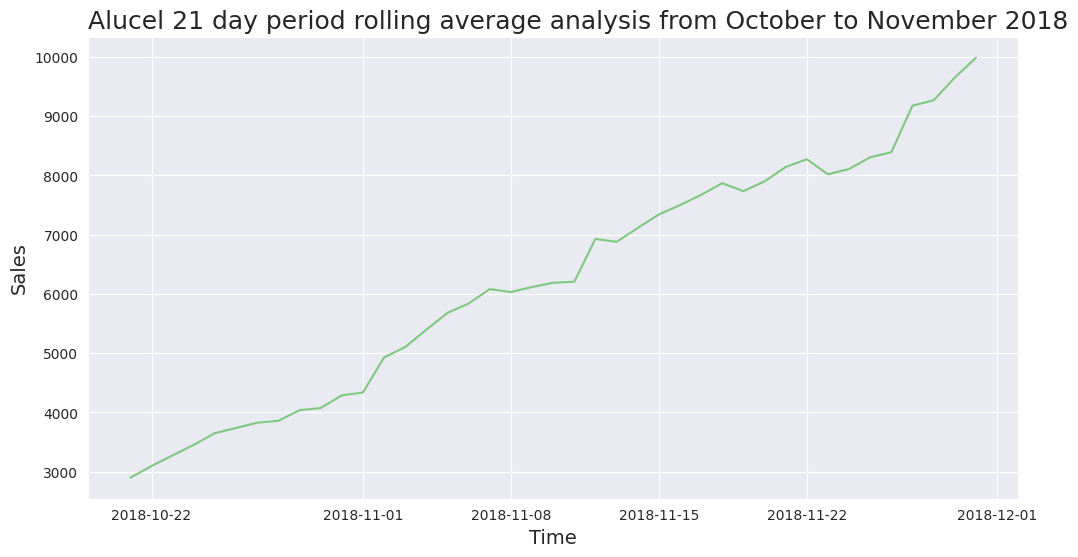

In [100]:
plot('Alucel 21 day period rolling average analysis from October to November 2018', 'Time', 'Sales', 'dia', 'rolling_average', alucel)

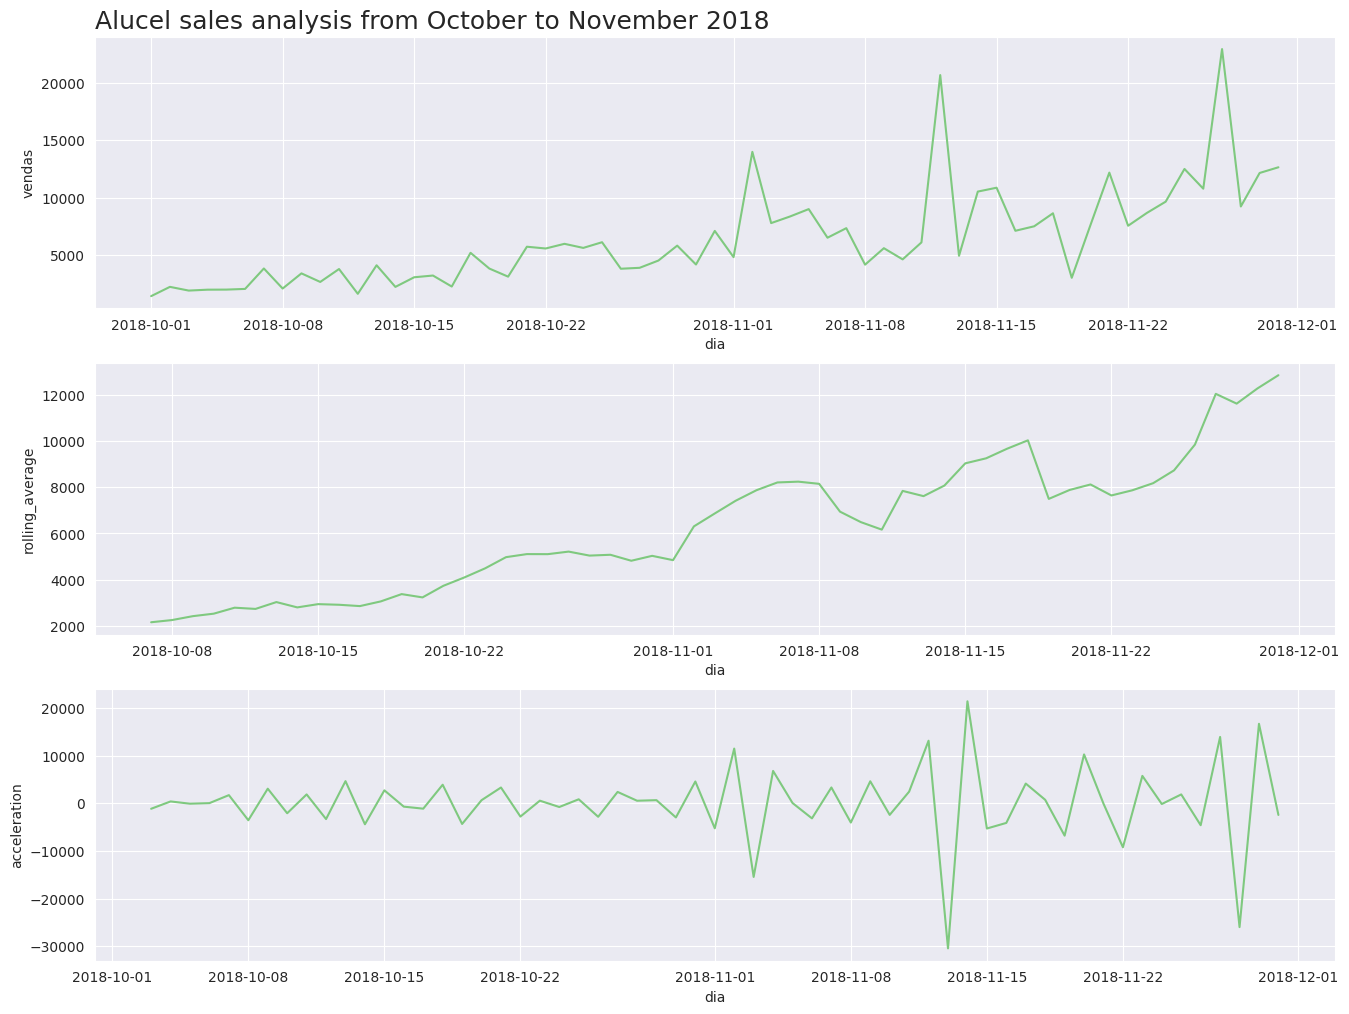

In [104]:
comparison_plot('dia', 'vendas', 'rolling_average', 'acceleration', 'Alucel sales analysis from October to November 2018', 'Time', 'increase', alucel)